## Observations and Insights

Observations & inferences:
1) Drug regimens Capomulin & Ramicane were tested more than the other drug regimens.  All other drug regimens were tested relatively the same amount.
2) The mice's final tumor volume tested with drug regimens Capomulin, Ramicane & Ceftamine are normal - there are no significant outliers.  Infubinol, on the other hand, does have outliers as noted in the graphic below and computed potential outliers.
3) Weight and average tumor volume for mice tested with Capomulin has a positive correlation - as mice weight increases, so does the average tumor volume.


## Dependencies and starter code

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
all_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_data_mean = all_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_data_median = all_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_data_variance = all_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_data_std = all_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_data_SEM = all_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


tumor_data_summary = pd.DataFrame({"Tumor Volume Mean":tumor_data_mean,
                                   "Tumor Volume Median":tumor_data_median,
                                   "Tumor Volume Variance":tumor_data_variance,
                                   "Tumor Volume Std Dev":tumor_data_std,
                                   "Tumor Volume SEM":tumor_data_SEM})
tumor_data_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

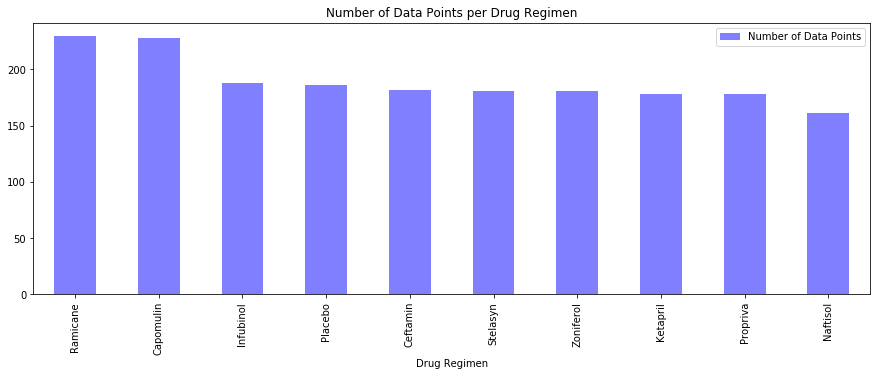

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
x_axis = all_data["Drug Regimen"].unique()
y_axis = all_data["Drug Regimen"].value_counts()

drug_data = pd.DataFrame({"Drug Regimen": x_axis, "Number of Data Points": y_axis})
drug_data = drug_data.set_index("Drug Regimen")

drug_data.plot(kind="bar", facecolor="blue", alpha=0.5, figsize=(15,5))

plt.title("Number of Data Points per Drug Regimen")

plt.show()

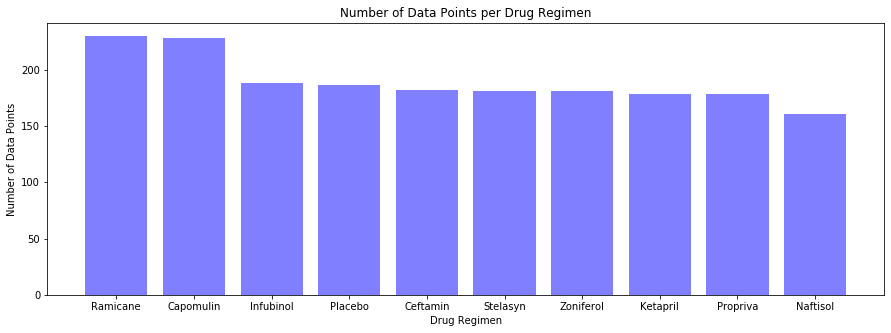

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = all_data["Drug Regimen"].unique()
y_axis = all_data["Drug Regimen"].value_counts()

plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, color="b", alpha=0.5, align="center")

plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

## Pie plots

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

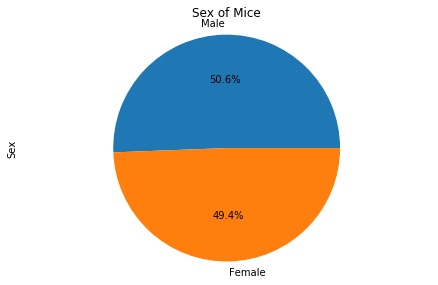

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_type = all_data["Sex"].unique()
sex_count = all_data["Sex"].value_counts()

mice_pie=sex_count.plot(kind="pie", y=sex_type, autopct="%1.1f%%", title="Sex of Mice")
mice_pie.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")

Text(0, 0.5, 'Sex')

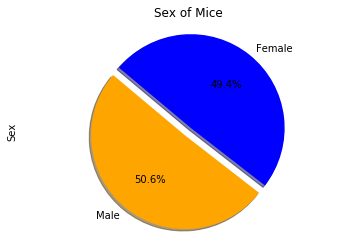

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_type = all_data["Sex"].unique()
sex_count = all_data["Sex"].value_counts()
colors = ["orange", "blue"]
explode = (0.1,0)

plt.pie(sex_count, explode=explode, labels=sex_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Sex of Mice")
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

final_volume = all_data.groupby(["Mouse ID"]).max()
final_volume = final_volume.reset_index()

merged_data = final_volume[["Mouse ID","Timepoint"]].merge(all_data,on=["Mouse ID","Timepoint"],how="left")

capomulin_data = merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin")]["Tumor Volume (mm3)"]
ramicane_data = merged_data.loc[(merged_data["Drug Regimen"]=="Ramicane")]["Tumor Volume (mm3)"]
infubinol_data = merged_data.loc[(merged_data["Drug Regimen"]=="Infubinol")]["Tumor Volume (mm3)"]
ceftamin_data = merged_data.loc[(merged_data["Drug Regimen"]=="Ceftamin")]["Tumor Volume (mm3)"]

In [30]:
#Capomulin
cap_quartiles = capomulin_data.quantile([.25, .5, .75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin IQR is {cap_iqr}")
print(f"Capomulin potential outliers: {capomulin_data.loc[(capomulin_data < cap_lower_bound) | (capomulin_data > cap_upper_bound)]}")

Capomulin IQR is 7.781863460000004
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [31]:
#Ramicane
ram_quartiles = ramicane_data.quantile([.25, .5, .75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane IQR is {ram_iqr}")
print(f"Ramicane potential outliers: {ramicane_data.loc[(ramicane_data < ram_lower_bound) | (ramicane_data > ram_upper_bound)]}")

Ramicane IQR is 9.098536719999998
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [32]:
#Infubinol
inf_quartiles = infubinol_data.quantile([.25, .5, .75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol IQR is {inf_iqr}")
print(f"Infubinol potential outliers: {infubinol_data.loc[(infubinol_data < inf_lower_bound) | (infubinol_data > inf_upper_bound)]}")

Infubinol IQR is 11.477135160000003
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [33]:
#Ceftamin
ceft_quartiles = ceftamin_data.quantile([.25, .5, .75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamine IQR is {ceft_iqr}")
print(f"Ceftamin potential outliers: {ceftamin_data.loc[(ceftamin_data < ceft_lower_bound) | (ceftamin_data > ceft_upper_bound)]}")

Ceftamine IQR is 15.577752179999997
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


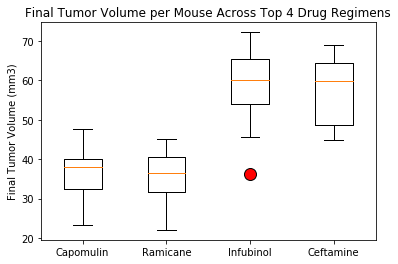

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Highlight any potential outliers in the plot by changing their color and style.
# Most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

outlier_color = dict(markerfacecolor='red',markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume per Mouse Across Top 4 Drug Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([capomulin_data,ramicane_data,infubinol_data,ceftamin_data], 
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamine"],
            flierprops=outlier_color)
plt.show()

## Line and scatter plots

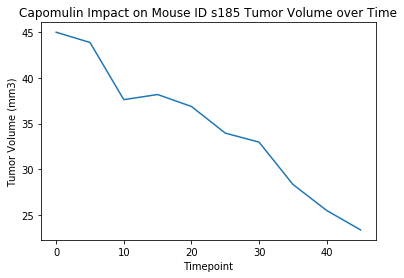

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = all_data.loc[(all_data["Drug Regimen"]=="Capomulin")]
mouse_track = capomulin_data.loc[(capomulin_data["Mouse ID"]=="s185")]

x_axis = mouse_track["Timepoint"]
y_axis = mouse_track["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Capomulin Impact on Mouse ID s185 Tumor Volume over Time')

plt.show()

Text(0.5, 1.0, 'Capomulin Impact on Average Tumor Volume per Mouse Weight')

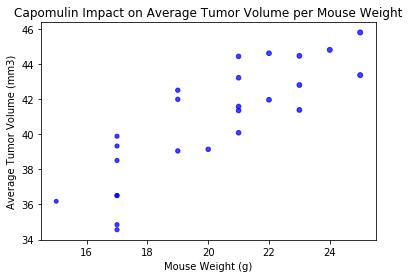

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = all_data.loc[(all_data["Drug Regimen"]=="Capomulin")]
mouse_ID = capomulin_data.groupby("Mouse ID").mean()

x_axis = mouse_ID["Weight (g)"]
y_axis = mouse_ID["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", s=x_axis, alpha = 0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f'Capomulin Impact on Average Tumor Volume per Mouse Weight')

The correlation between Weight & Average Tumor Volume is 0.84


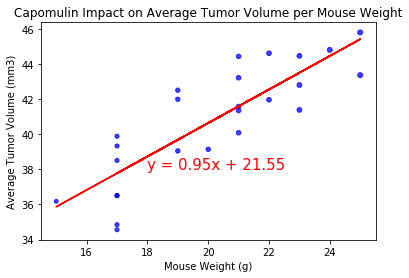

In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

capomulin_data = all_data.loc[(all_data["Drug Regimen"]=="Capomulin")]
mouse_ID = capomulin_data.groupby("Mouse ID").mean()

x_axis = mouse_ID["Weight (g)"]
y_axis = mouse_ID["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Weight & Average Tumor Volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", s=x_axis, alpha = 0.75)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(18,38),fontsize=15, color="red")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f'Capomulin Impact on Average Tumor Volume per Mouse Weight')
plt.show()